In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* **We use a random forests**

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.


# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0264825323571, cross=0.152862664871
3600: Fitting... Scoring... Calc.err... train=0.0254267402602, cross=0.144469255573
10800: Fitting... Scoring... Calc.err... train=0.0208183224773, cross=0.121300947107
21600: Fitting... Scoring... Calc.err... train=0.0184636125222, cross=0.107951975728
43200: Fitting... Scoring... Calc.err... train=0.01849322, cross=0.10098484
86400: Fitting... Scoring... Calc.err... train=0.01986816, cross=0.1048849


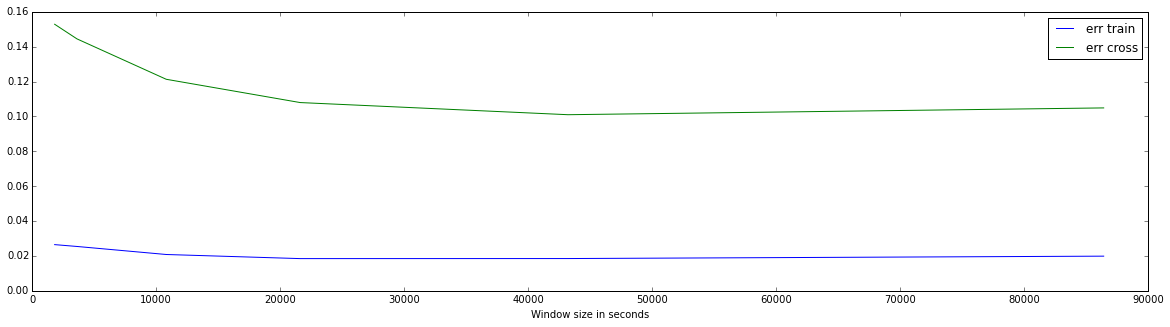

Best window size: 43200
Evaluation using Alex' data:


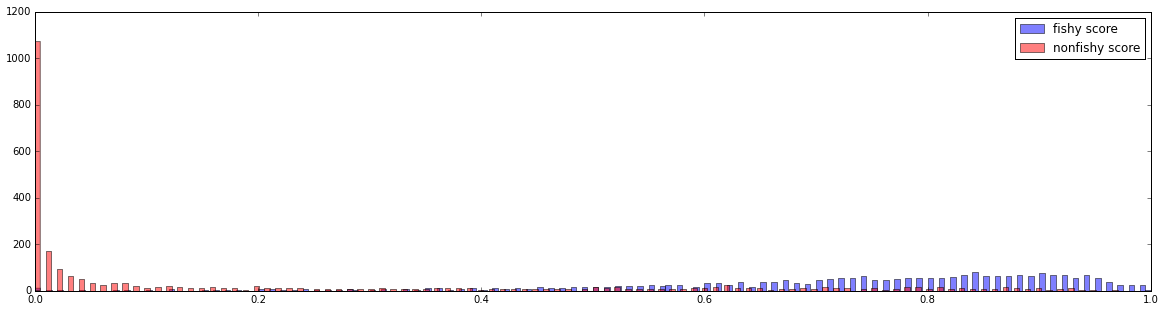

Squared numerical error: 0.1048813
Error (overlap): 14.12%
False positives given cutoff at 0.5: 20.324005891%


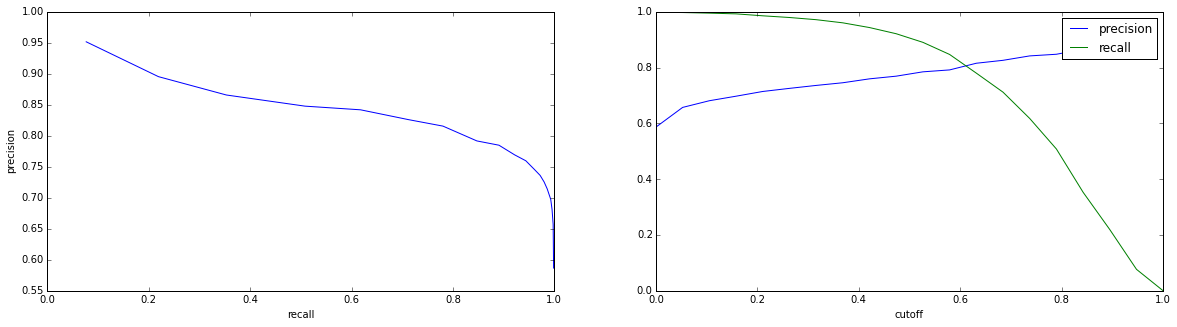

Score window: [43200]
Evaluate using Kristinas data:


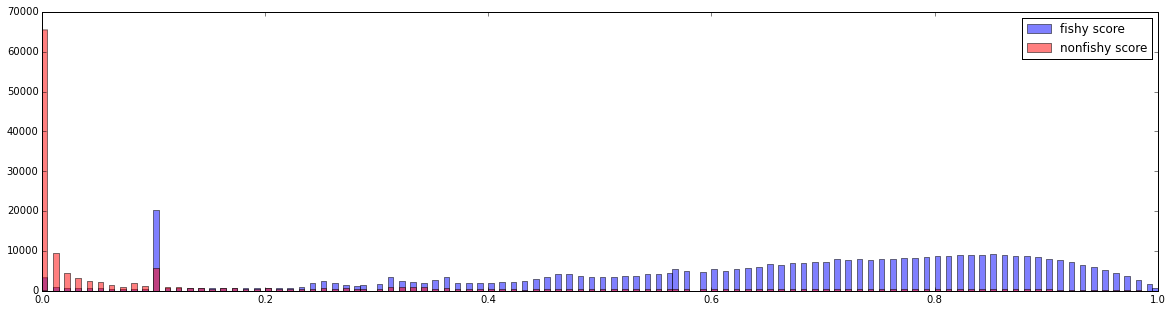

Squared numerical error: 0.162321349104
Error (overlap): 18.8873124684%
False positives given cutoff at 0.5: 10.5212874985%


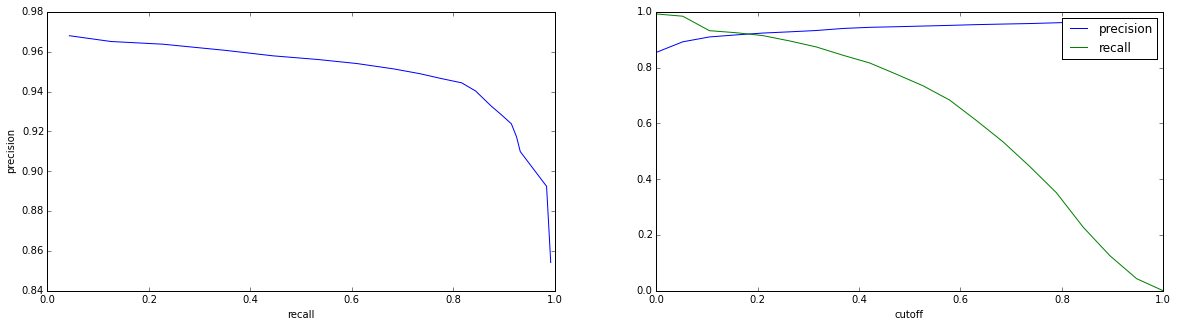

Score window: [43200]


In [2]:
x, xtrain, xcross, xtest = load_dataset('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset('datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, [min_window])
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, [min_window])

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

In [3]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0310094281972, cross=0.126834463742
3600: Fitting... Scoring... Calc.err... train=0.0269180406522, cross=0.123881000252
10800: Fitting... Scoring... Calc.err... train=0.0167482079166, cross=0.108657067986
21600: Fitting... Scoring... Calc.err... train=0.0152325315571, cross=0.0986158550087
43200: Fitting... Scoring... Calc.err... train=0.01205793, cross=0.08754308
86400: Fitting... Scoring... Calc.err... train=0.01191602, cross=0.08186796


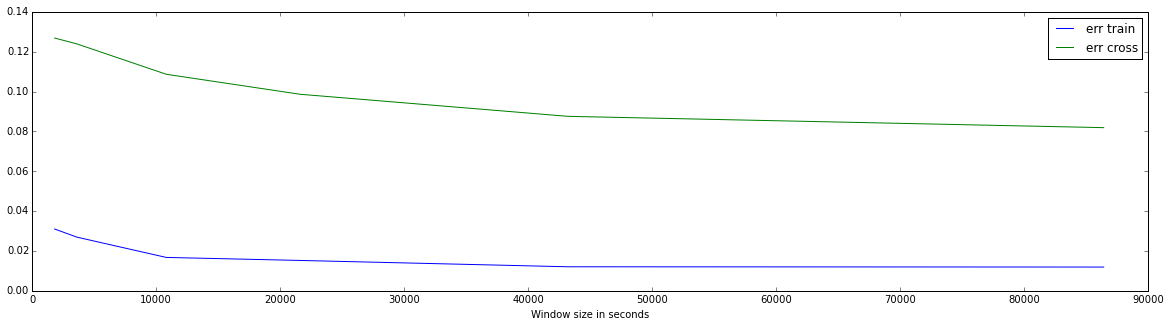

Best window size: 86400


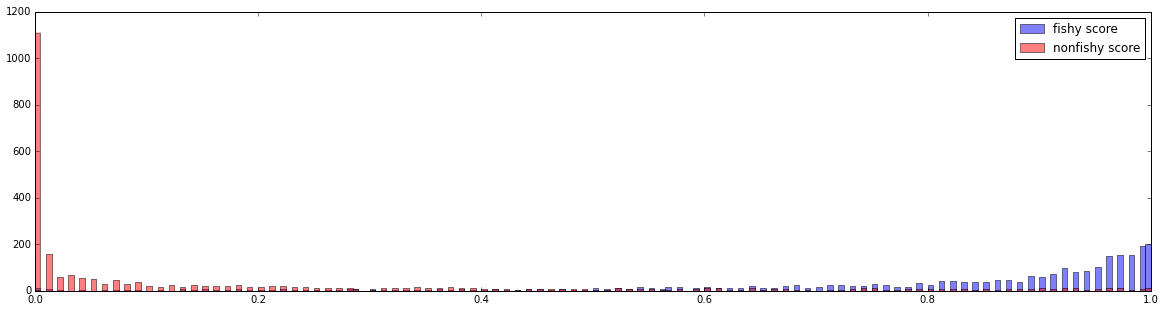

Squared numerical error: 0.08873014
Error (overlap): 22.08%
False positives given cutoff at 0.5: 26.3036809816%


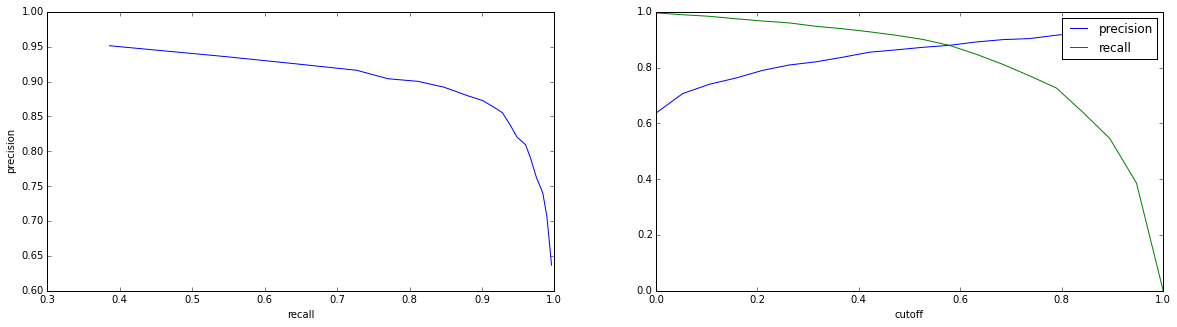

Score window: [86400]


In [4]:
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

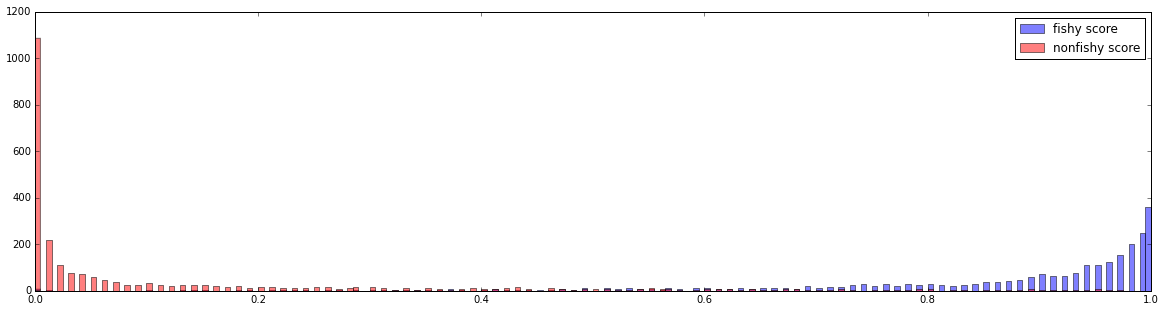

Squared numerical error: 0.05592686
Error (overlap): 13.2%
False positives given cutoff at 0.5: 16.595579682%


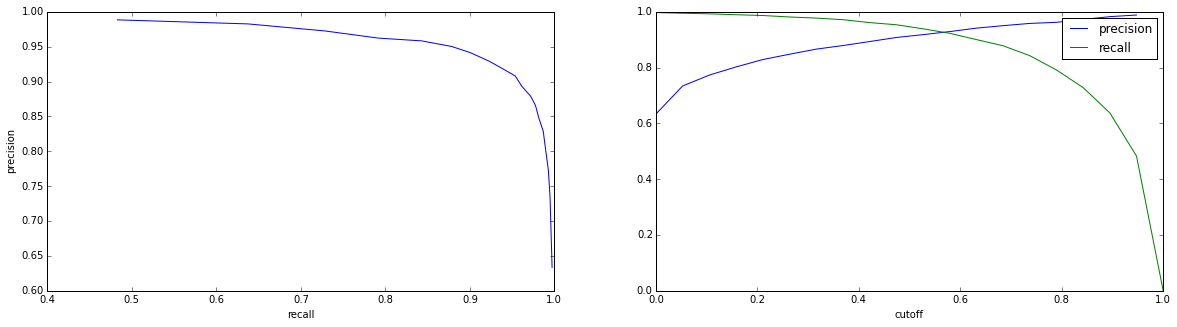

Score window: [10800, 21600, 43200, 86400]


In [5]:
evaluate_score(xtrain, xtest, [10800, 21600, 43200, 86400])

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

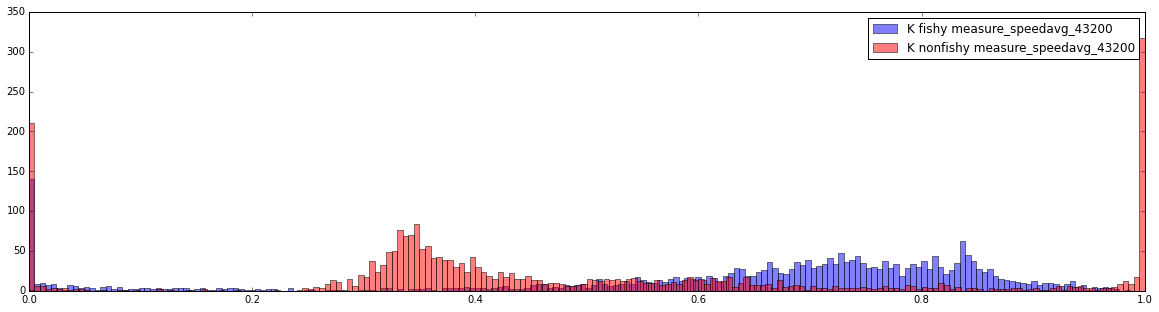

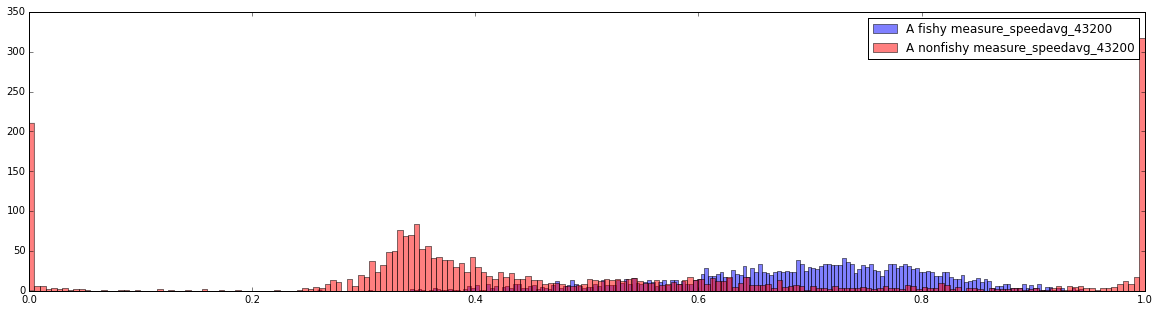

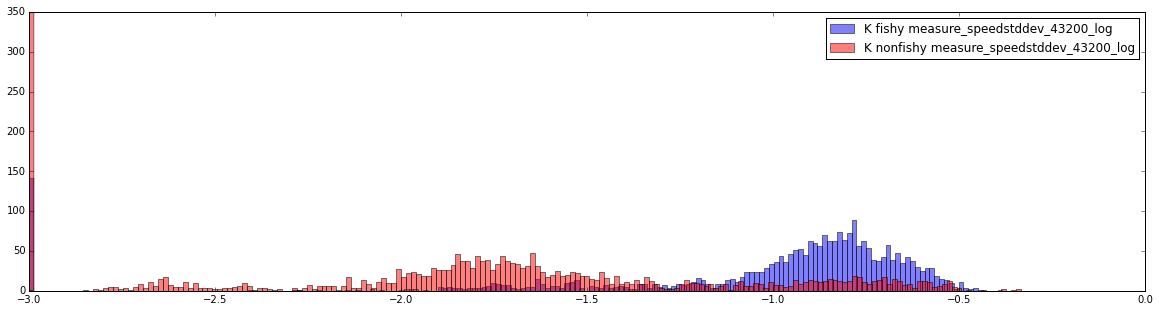

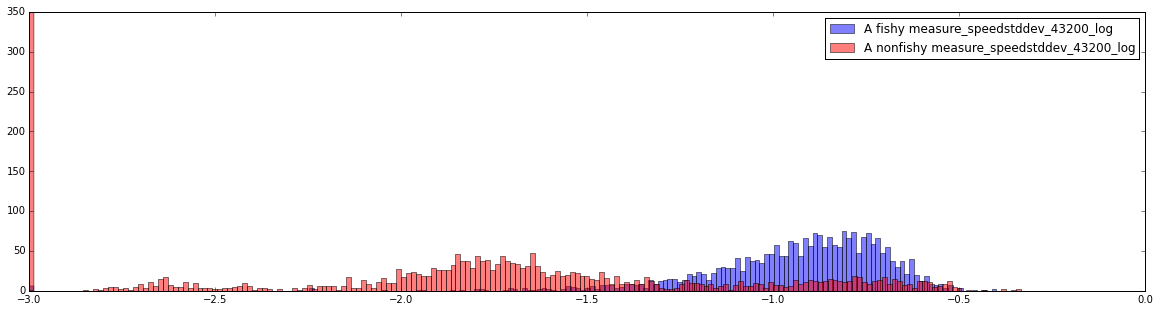

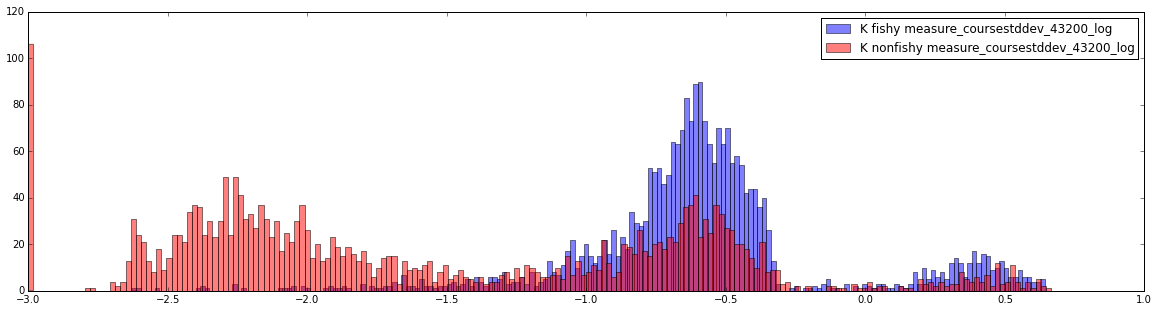

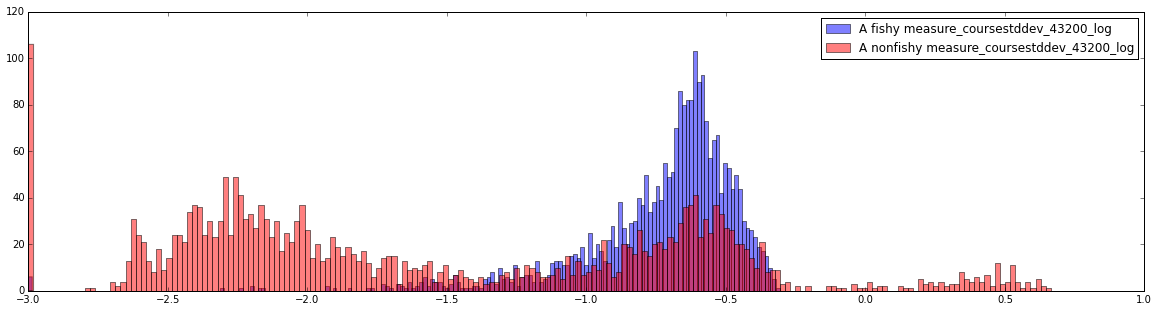

In [6]:
_x, _xtrain, _xcross, _xtest = load_dataset('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

In [7]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_trawl.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0222023956882, cross=0.117039399052
3600: Fitting... Scoring... Calc.err... train=0.0193099688141, cross=0.113837297506
10800: Fitting... Scoring... Calc.err... train=0.0155184409591, cross=0.110978389454
21600: Fitting... Scoring... Calc.err... train=0.0152823363413, cross=0.112248262826
43200: Fitting... Scoring... Calc.err... train=0.01615272, cross=0.12662346
86400: Fitting... Scoring... Calc.err... train=0.01781431, cross=0.13869414


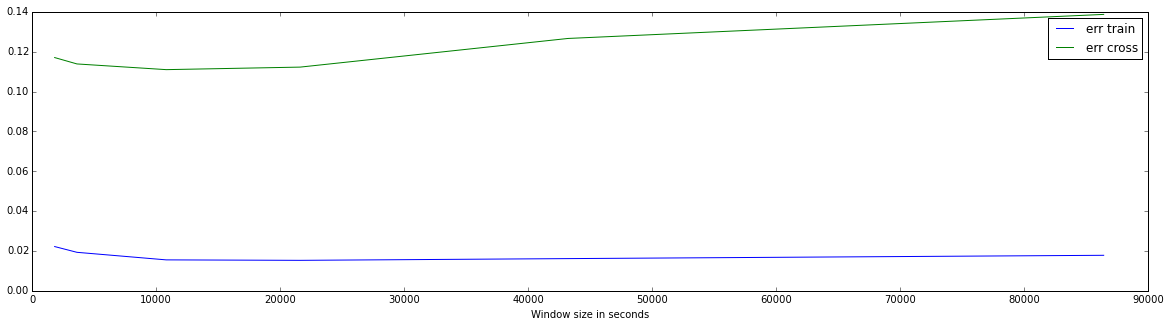

Best window size: 10800


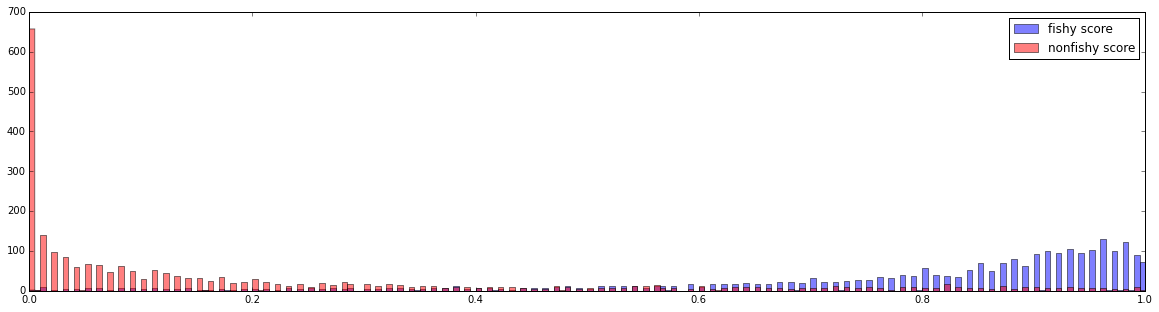

Squared numerical error: 0.104831339081
Error (overlap): 26.72%
False positives given cutoff at 0.5: 29.3453724605%


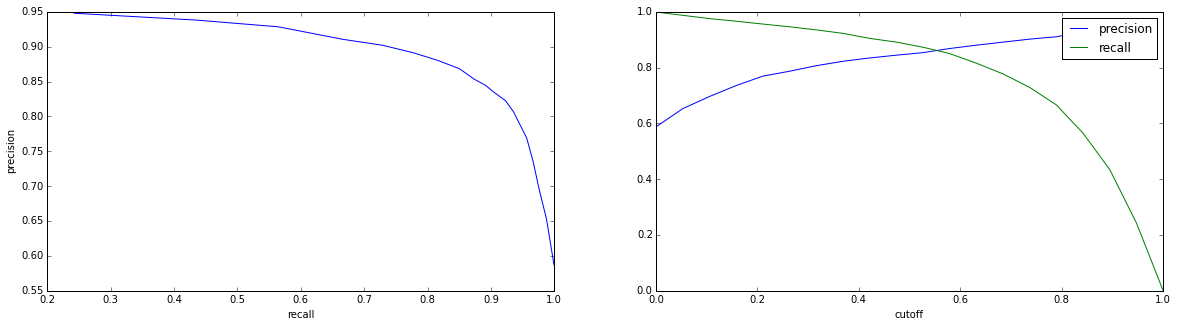

Score window: [10800]


In [8]:
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

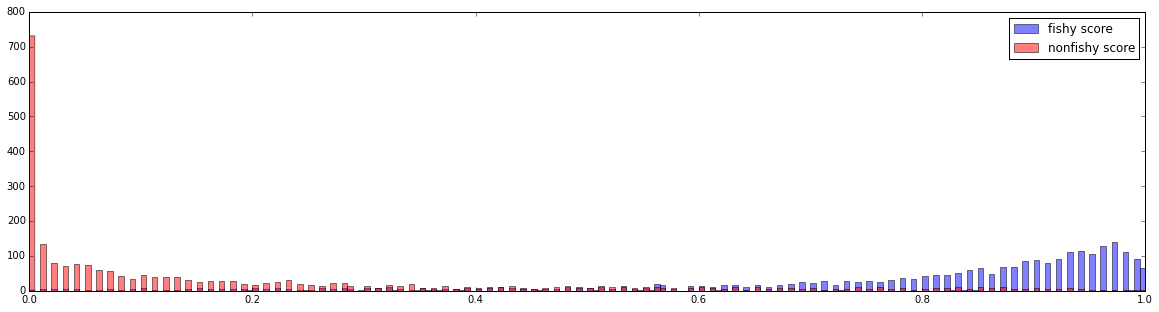

Squared numerical error: 0.0944025739829
Error (overlap): 24.48%
False positives given cutoff at 0.5: 25.9174311927%


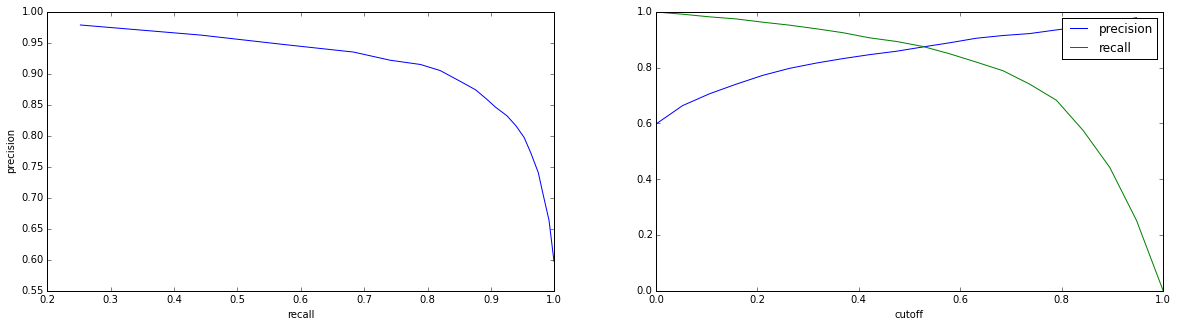

Score window: [1800, 3600, 10800, 21600]


In [9]:
evaluate_score(xtrain, xtest, [1800, 3600, 10800, 21600])

# Purse seiners

In [10]:
x, xtrain, xcross, xtest = load_dataset('datasets/kristina_ps.measures.npz')

Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0167779231947, cross=0.0835700182481
3600: Fitting... Scoring... Calc.err... train=0.014461693595, cross=0.0805647265836
10800: Fitting... Scoring... Calc.err... train=0.0133003780515, cross=0.0814015652426
21600: Fitting... Scoring... Calc.err... train=0.0129796133766, cross=0.0818330565801
43200: Fitting... Scoring... Calc.err... train=0.014127544175, cross=0.0972124875727
86400: Fitting... Scoring... Calc.err... train=0.01308795, cross=0.09005474


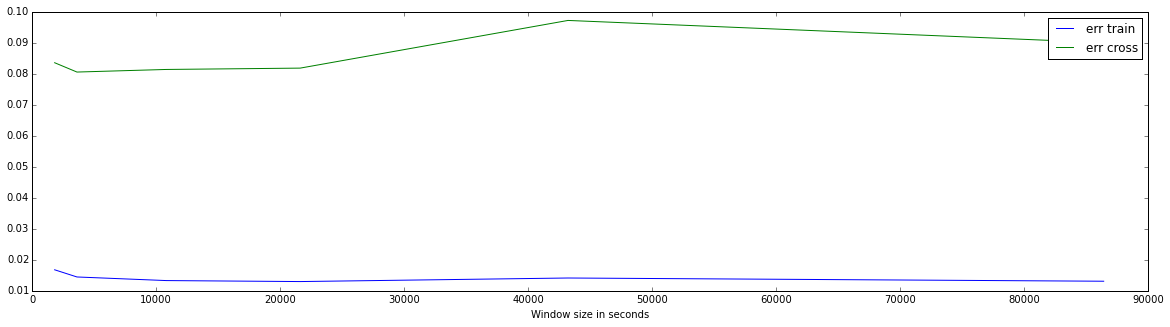

Best window size: 3600


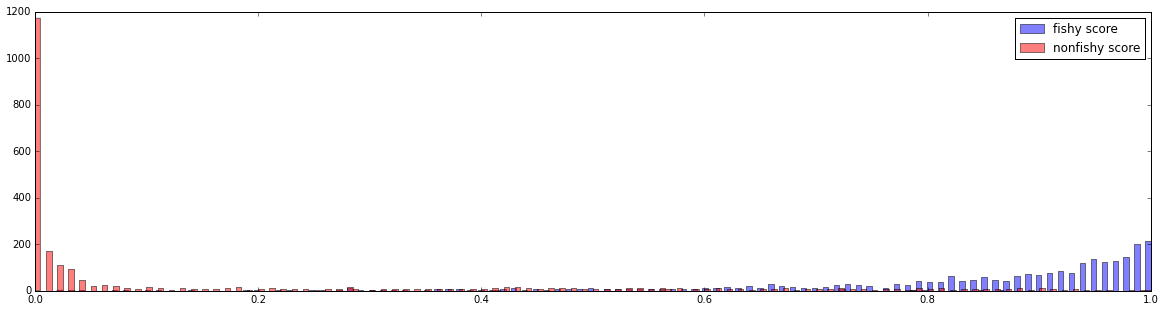

Squared numerical error: 0.0789881994785
Error (overlap): 10.32%
False positives given cutoff at 0.5: 14.5231213873%


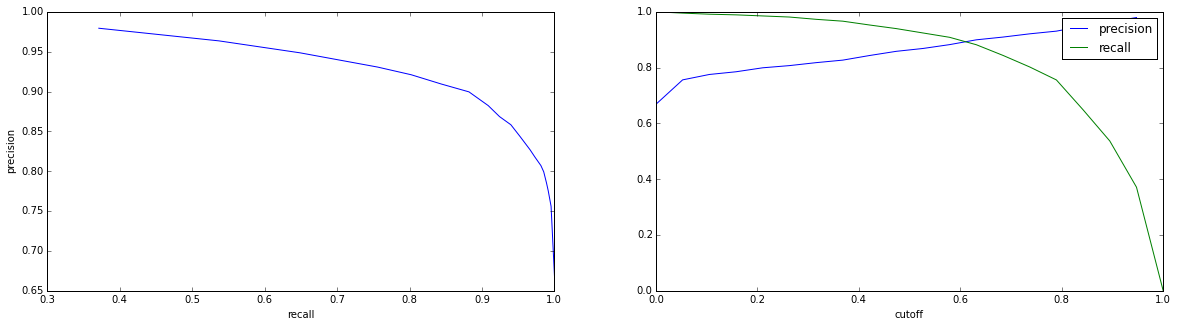

Score window: [3600]


In [11]:
import imp, scoring
imp.reload(scoring)
from scoring import *
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

In [12]:
min_window

3600

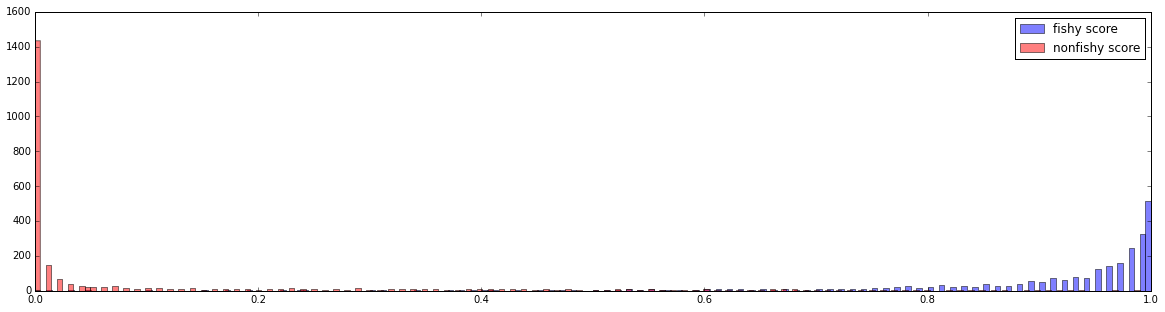

Squared numerical error: 0.0462982465931
Error (overlap): 4.0%
False positives given cutoff at 0.5: 1.26582278481%


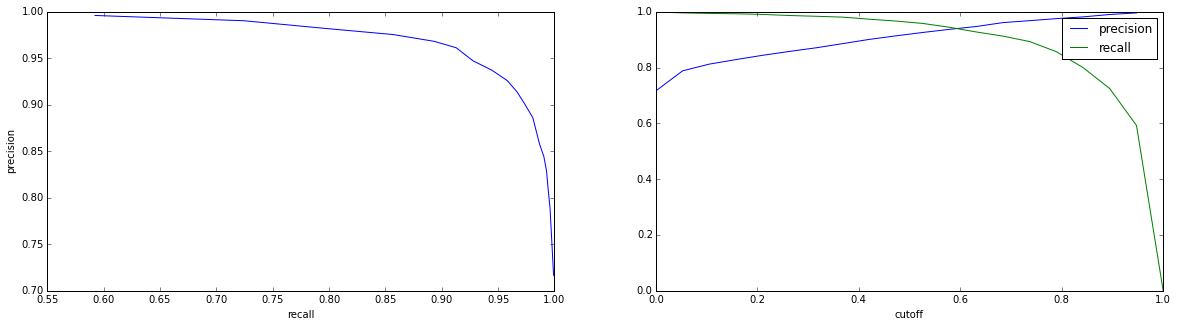

Score window: [1800, 3600, 10800, 21600]


In [13]:
evaluate_score(xtrain, xtest, [1800, 3600, 10800, 21600])